# Hello MVI Validator

## The most outer interface "command" (command option -> stdout)

In [35]:
!mvi-validator deployed-model detection \
    --api "https://mvi.ibm.com/api/dlapis/bb44e214-e208-4e6a-a88b-d9ab173023da"\
    "../test_data/test_ball_bearing_normal_and_stain"


# Summary
|   num_gt |   num_pd |   tp |   fp |   fn |   precision |   recall |   fmeasure |       AP |      mAP |
|---------:|---------:|-----:|-----:|-----:|------------:|---------:|-----------:|---------:|---------:|
|       27 |        9 |    8 |    1 |   19 |    0.888889 | 0.296296 |   0.444444 | 0.917695 | 0.903846 |

# Summary of each labels
|   num_gt |   num_pd |   tp |   fp |   fn |   precision |   recall |   fmeasure |       AP | label                  |
|---------:|---------:|-----:|-----:|-----:|------------:|---------:|-----------:|---------:|:-----------------------|
|       14 |        5 |    5 |    0 |    9 |        1    | 0.357143 |   0.526316 | 1        | ball_bearing           |
|       13 |        4 |    3 |    1 |   10 |        0.75 | 0.230769 |   0.352941 | 0.807692 | ball_bearing_oil_stain |


## The second outer interface "function" (string -> text io)


In [36]:
import mvi_validator

import io
sio: io.StringIO = io.StringIO()

mvi_validator.cli_main__deployed_model__object_detection__measure_accuracy(
    dataset_dir="../test_data/test_ball_bearing_normal_and_stain",
    api_url="https://mvi.ibm.com/api/dlapis/bb44e214-e208-4e6a-a88b-d9ab173023da",
    output_tio=sio
)

s: str = sio.getvalue()
print(s)


# Summary
|   num_gt |   num_pd |   tp |   fp |   fn |   precision |   recall |   fmeasure |       AP |      mAP |
|---------:|---------:|-----:|-----:|-----:|------------:|---------:|-----------:|---------:|---------:|
|       27 |        9 |    8 |    1 |   19 |    0.888889 | 0.296296 |   0.444444 | 0.917695 | 0.903846 |

# Summary of each labels
|   num_gt |   num_pd |   tp |   fp |   fn |   precision |   recall |   fmeasure |       AP | label                  |
|---------:|---------:|-----:|-----:|-----:|------------:|---------:|-----------:|---------:|:-----------------------|
|       14 |        5 |    5 |    0 |    9 |        1    | 0.357143 |   0.526316 | 1        | ball_bearing           |
|       13 |        4 |    3 |    1 |   10 |        0.75 | 0.230769 |   0.352941 | 0.807692 | ball_bearing_oil_stain |



## The third outer interface "function" ( string -> pandas.dataframe)

In [37]:
import mvi_validator

summary_df, label2summary_df, gt_bboxes_df, pd_bboxes_df = \
    mvi_validator.main__deployed_model__object_detection__measure_accuracy(
        dataset_dir="../test_data/test_ball_bearing_normal_and_stain",
        api_url="https://mvi.ibm.com/api/dlapis/bb44e214-e208-4e6a-a88b-d9ab173023da",    
    )


In [38]:
summary_df

,num_gt,num_pd,tp,fp,fn,precision,recall,fmeasure,AP,mAP
0,27,9,8,1,19,0.888889,0.296296,0.444444,0.917695,0.903846


In [39]:
summary_df

,num_gt,num_pd,tp,fp,fn,precision,recall,fmeasure,AP,mAP
0,27,9,8,1,19,0.888889,0.296296,0.444444,0.917695,0.903846


In [40]:
label2summary_df

,num_gt,num_pd,tp,fp,fn,precision,recall,fmeasure,AP,label
0,14,5,5,0,9,1.00,0.357143,0.526316,1.000000,ball_bearing
0,13,4,3,1,10,0.75,0.230769,0.352941,0.807692,ball_bearing_oil_stain


 ## Scatter plot with pandas
 
 - [pandas.DataFrame.plot.scatter](https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html)

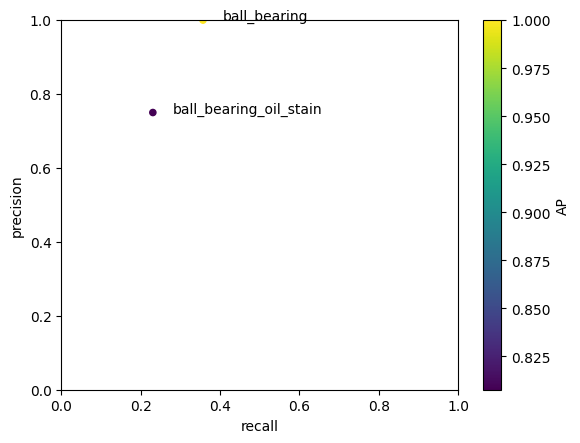

In [69]:
ax = label2summary_df.plot.scatter(x='recall', y='precision', c="AP")

# Set range of axes from 0.0 to 1.0
ax.set_xlim(0,1)
ax.set_ylim(0,1)

# Add data labels
for i, label in enumerate(label2summary_df.label):
    ax.annotate(label, (label2summary_df.recall.iat[i]+0.05, label2summary_df.precision.iat[i]))


## Scatter plot with matplotlib
- [matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

(0.0, 1.0)

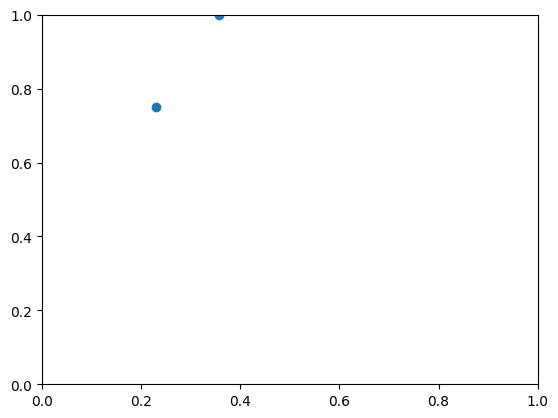

In [84]:
import matplotlib.pyplot 

matplotlib.pyplot.scatter(label2summary_df.recall, label2summary_df.precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


(0.0, 1.0)

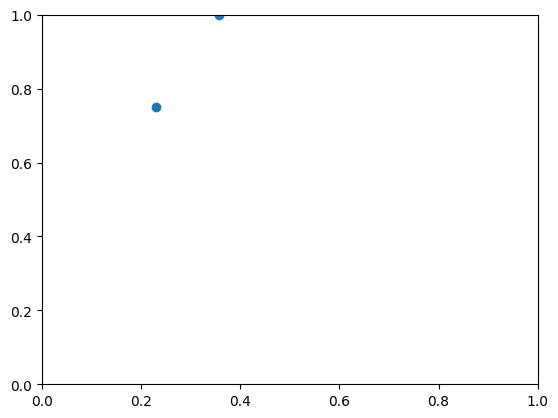

In [88]:
fig, ax = matplotlib.pyplot .subplots()
ax.scatter(label2summary_df.recall, label2summary_df.precision)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])